# Justin Keener
## Assignment 3: Filters and Frequency
## Date: 03/28/2018
## Digital Image Processing

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Creates the image path to be read into a variable
img_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/im1.jpg"
img = cv2.imread(img_path,0)

img2_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/im2.jpg"
img2 = cv2.imread(img2_path,0)

img3_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/im3.jpg"
img3 = cv2.imread(img3_path,0)

img4_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/im4.jpg"
img4 = cv2.imread(img4_path,0)

img5_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/im5.jpg"
img5 = cv2.imread(img5_path,0)

img6_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/im6.jpg"
img6 = cv2.imread(img6_path,0)

img7_path = "/Users/justinkeener/Desktop/Digital-Image-Class/images/im7.jpg"
img7 = cv2.imread(img7_path,0)

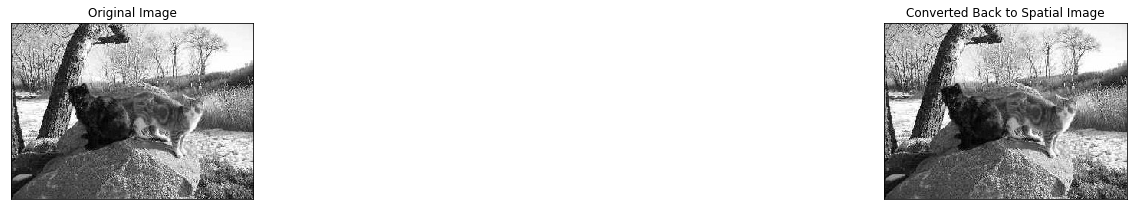

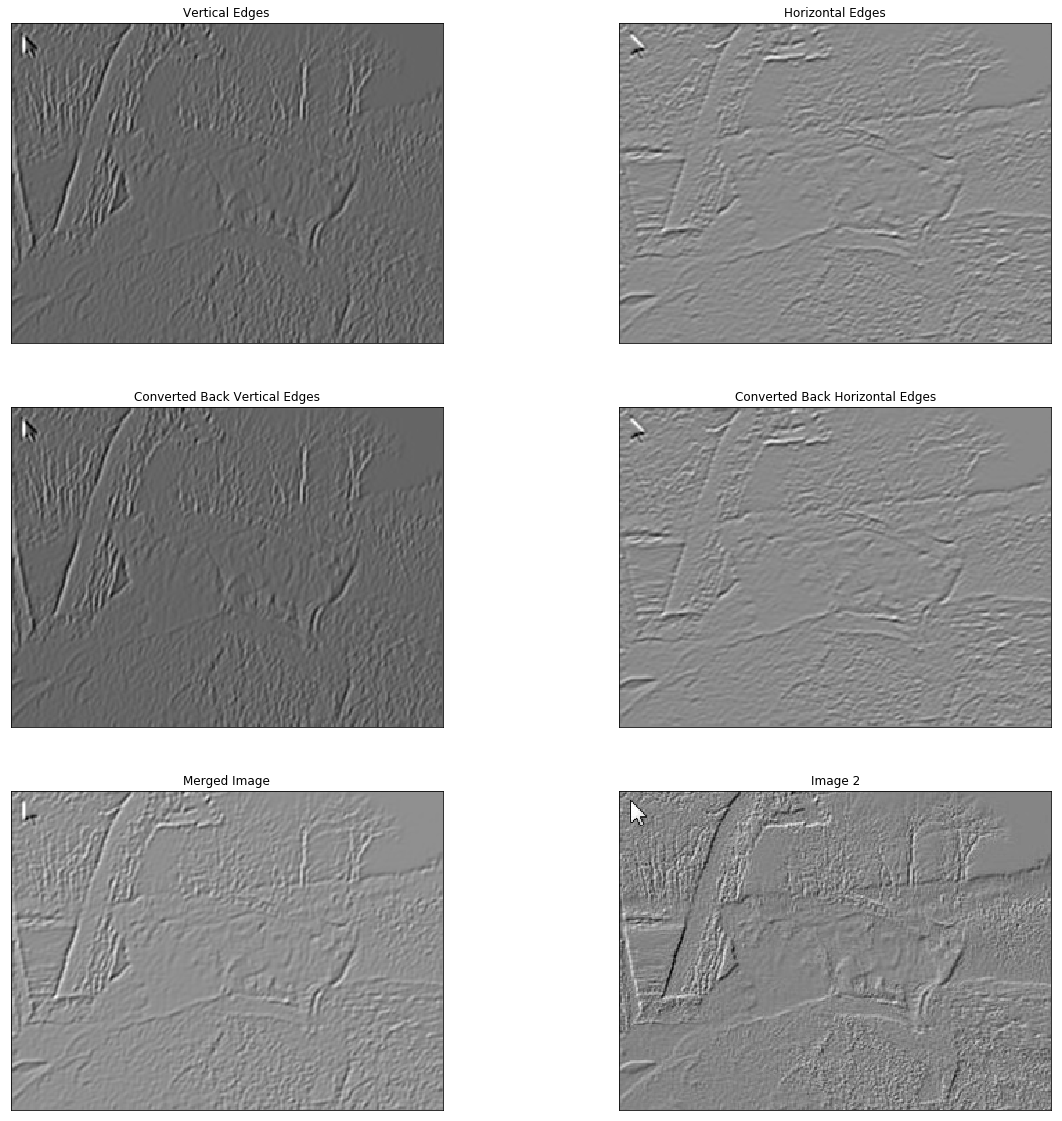

In [10]:
# Part 1:Converting Image to Frequency then to Spatial Domain and Merging Horizontal Edges and Vortical Edges 
"""
Function: convert_img
Parameter: image

1. Shifts an image to the Frequency Domain
2. Converts the image back to the Spatial Domain
3. Displays both images
"""

def convert_img(image):
    # Convert to Frequency Domain
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # Convert back to Spatial
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = img_back.real

    # Plots the Original Image and the Image Converted Back
    plt.figure(figsize=(20,20))
    plt.subplot(141),plt.imshow(image, cmap = 'gray'),plt.title('Original Image'),plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(img_back, cmap  = 'gray'),plt.title('Converted Back to Spatial Image'),plt.xticks([]), plt.yticks([])
    plt.show()
convert_img(img)

"""
function: merge_images
Parameter: image
1. Takes in an image
2. Determines the horizontal and vertical edges of the image
3. Converts the edges to the frequency domain
4. Converts the edges back to Spatial Domain
5. Merges the two edges together to form another image that resembles image 2
"""

def merge_edges(image):
    # Horizontal and Vertical Edges
    VE = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 5)
    HE = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 5)

    # Vertical Edges Converted to Frequency Domain
    ve = np.fft.fft2(VE)
    ve_shift = np.fft.fftshift(ve)
   
    # Horizontal Edges Converted to Frequency Domain
    he = np.fft.fft2(HE)
    he_shift = np.fft.fftshift(he)

    # Vertical Edges converted back to Spatial Domain
    ve_shift = np.fft.ifftshift(ve_shift)
    ve_ifft = np.fft.ifft2(ve_shift)
    ve_ifft = ve_ifft.real

    # Horizontal Edges converted back to Spatial Domain
    he_ishift = np.fft.ifftshift(he_shift)
    he_ifft = np.fft.ifft2(he_ishift)
    he_ifft = he_ifft.real

    # Horizontal and Vertical Edges merged together to form Image 2
    merged_img = cv2.add(ve_ifft,he_ifft)

    # Plotting the Horizontal & Vertical Edges in Spatial Domain & Magnitude and Phase Spectrum in the Frequency Domain, and the Merged Image
    plt.figure(figsize=(20,20))
    plt.subplot(321),plt.imshow(VE, cmap = 'gray'),plt.title('Vertical Edges'),plt.xticks([]), plt.yticks([])
    plt.subplot(322),plt.imshow(HE, cmap = 'gray'),plt.title('Horizontal Edges'),plt.xticks([]), plt.yticks([])
    plt.subplot(323),plt.imshow(ve_ifft, cmap = 'gray'),plt.title('Converted Back Vertical Edges'),plt.xticks([]), plt.yticks([])
    plt.subplot(324),plt.imshow(he_ifft, cmap = 'gray'),plt.title('Converted Back Horizontal Edges'),plt.xticks([]), plt.yticks([])
    plt.subplot(325),plt.imshow(merged_img, cmap = 'gray'),plt.title('Merged Image'),plt.xticks([]), plt.yticks([])
    plt.subplot(326),plt.imshow(img2, cmap = 'gray'),plt.title('Image 2'),plt.xticks([]), plt.yticks([])
    plt.show()
merge_edges(img2)

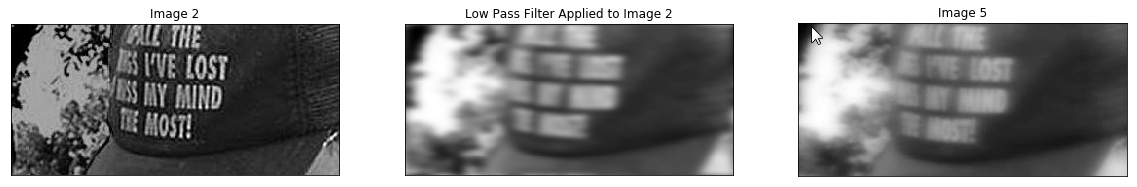

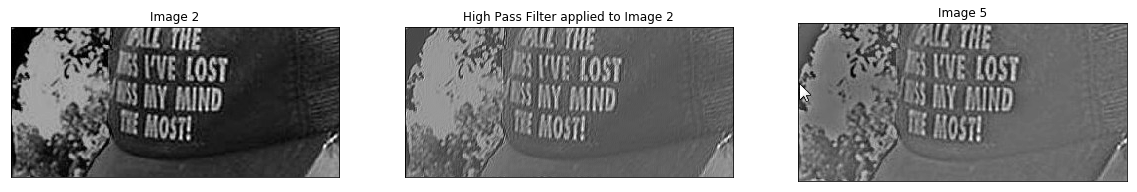

In [11]:
# Part 2: Low Pass and High Pass Filter applied to Image 3

f = np.fft.fft2(img3)
fshift = np.fft.fftshift(f)
rows,cols = img3.shape

"""
Function: Low Pass Filter

Parameters:
Sigma = Standard Deviation
Rows = Number of rows of the image
Cols = Number of columns of the image

dist = distance between pixels
H[i,j] = indexing each pixel to equal low pass filter equation
H = np.array(H) converts H into an array 

1. Creates a tuple H with dimension of the image
2. Traverses between each pixel of the image
3. Determines the distance between each pixel
4. Calculates each pixel to equate to the low pass filter
5. Converts H into an array
6. Applies the newly created low pass filter H to the image
7. Filtered image is converted back to the Spatial Domain to compare results
"""

def gauss_lowpass(sigma, rows,cols):
    H = np.zeros((rows,cols))
    # Traverses through each pixel of the image
    for i in range(rows):
        for j in range(cols):
            dist = ((rows/2 - i)**2 + (cols/2 - j)**2)
            H[i,j] = (1/(2*np.pi*(sigma**2)))*np.exp(-(dist)/(2*sigma**2))
            H = np.array(H)
    
    # Applies Low Pass Filter to Frequency Domain Image
    filt_img = H*fshift

    # Shifts image back after low pass filter has been applied
    img3_back = np.fft.ifftshift(filt_img)
    img3_back = np.fft.ifft2(img3_back)
    img3_back = img3_back.real
    
    # Plots images
    plt.figure(figsize=(20,20))
    plt.subplot(131), plt.imshow((img3), cmap='gray'),plt.title("Image 2"),plt.xticks([]),plt.yticks([])
    plt.subplot(132), plt.imshow((img3_back), cmap='gray'),plt.title("Low Pass Filter Applied to Image 2"),plt.xticks([]),plt.yticks([])
    plt.subplot(133), plt.imshow((img5), cmap='gray'),plt.title("Image 5"),plt.xticks([]),plt.yticks([])
    plt.show()
gauss_lowpass(10,rows,cols)

"""
Function: High Pass Filter

Parameters:
D0 = Cutoff Frequency
Rows = Number of rows of the image
Cols = Number of columns of the image

dist = distance between pixels
H[i,j] = indexing each pixel to equal high pass filter equation
H = np.array(H) converts H into an array 

1. Creates a tuple H with dimension of the image
2. Traverses between each pixel of the image
3. Determines the distance between each pixel
4. Calculates each pixel to equate to the low pass filter
5. Converts H into an array
6. Applies the newly created high pass filter H to the image
7. Filtered image is converted back to the Spatial Domain to compare results
"""

def highpass(D0,rows,cols):
    H = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            dist = np.sqrt((i**2) + (j**2))
            H[i,j] = np.exp(-(dist**2)/(2*(D0**2)))
            H = np.array(H)
    
    # Applies high pass filter to image
    filt_img = H*fshift

    # Converts Image back to Spatial Domain
    img3_back = np.fft.ifftshift(filt_img)
    img3_back = np.fft.ifft2(img3_back)
    img3_back = img3_back.real

    # Plots images
    plt.figure(figsize=(20,20))
    plt.subplot(131), plt.imshow((img3), cmap='gray'),plt.title("Image 2"),plt.xticks([]),plt.yticks([])
    plt.subplot(132), plt.imshow((img3_back), cmap='gray'),plt.title("High Pass Filter applied to Image 2"),plt.xticks([]),plt.yticks([])
    plt.subplot(133), plt.imshow((img4), cmap='gray'),plt.title("Image 5"),plt.xticks([]),plt.yticks([])
    plt.show()
highpass(80,rows,cols)


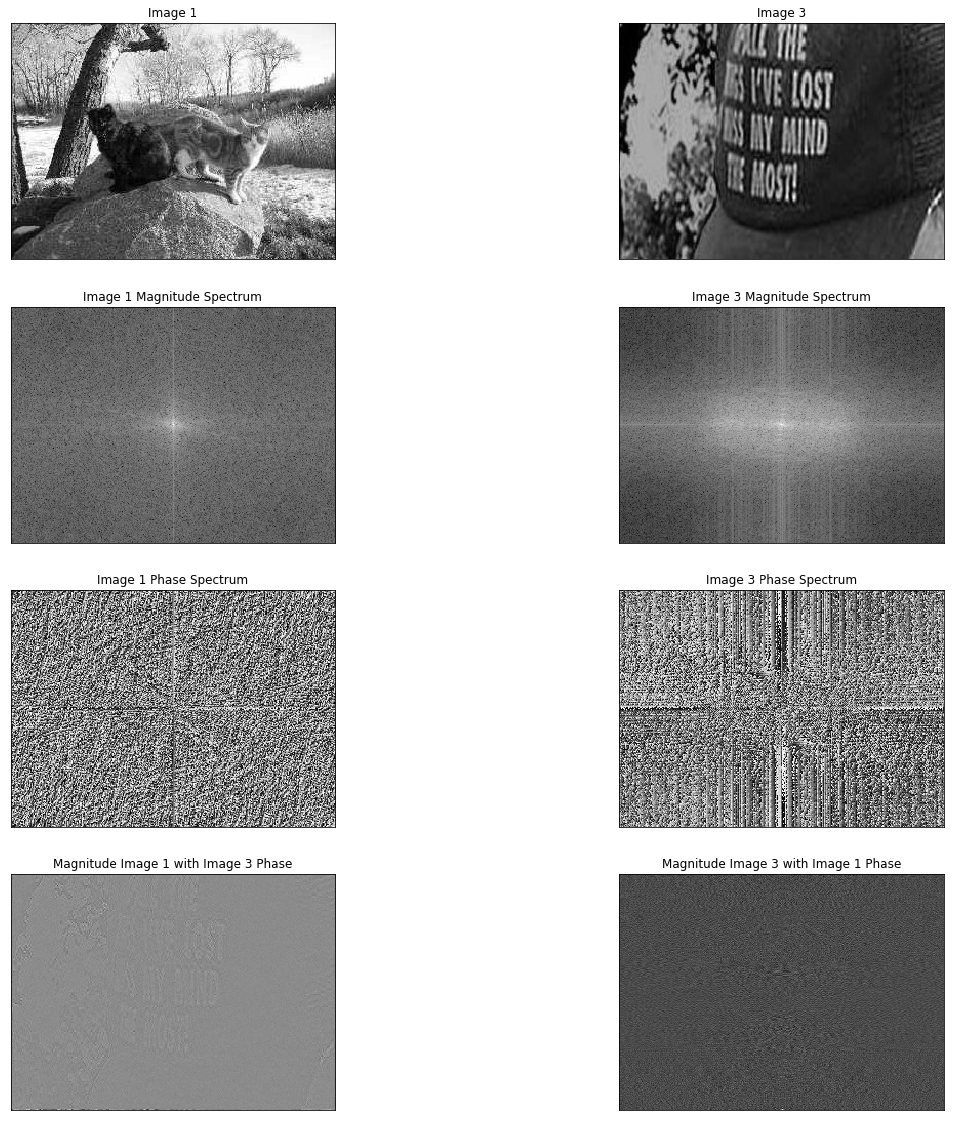

In [14]:
# Part 3: Swapping Phases for Image 1 and Image 3

"""
Function: swapPhase()
Parameters: image1, and image2

1. img1 and img3 are passed through the parameters
2. These images are converted to the Frequency Domain
3. Magnitudes and Phases are determined for each image
4. New output images are generated by swapping phases for the two different magnitudes
5. New output images are converted back to Spatial Domain
6. Results are plotted
"""
def swapPhase(image1,image2):
    
    # Resizes image 2
    image2 = cv2.resize(image2,(317,231))

    # Shift image 1 to Frequency Domain
    f = np.fft.fft2(image1)
    fshift = np.fft.fftshift(f)

    # Determine the magnitude and phase of Image 1 Frequency Domain
    magn_spectrum = np.log(1 + np.abs(fshift))
    phase = np.angle(fshift)

    # Shift image 1 to Frequency Domain
    f2 = np.fft.fft2(image2)
    fshift2 = np.fft.fftshift(f2)
    
    # Determine the magnitude and phase of Image 2 Frequency Domain
    magn_spectrum2 = np.log(1 + np.abs(fshift2))
    phase2 = np.angle(fshift2)

    # Swap the phases
    output_fimg1 = magn_spectrum*(np.exp(1j*phase2))
    output_fimg2 = magn_spectrum2*(np.exp(1j*phase))

    # Convert swapped phase images back to Spatial Domain
    ifftshift = np.fft.ifftshift(output_fimg1)
    ifft = np.fft.ifft2(ifftshift)
    ifft = ifft.real

    ifftshift2 = np.fft.ifft(output_fimg2)
    ifft2 = np.fft.ifft2(ifftshift2)
    ifft2 = ifft2.real

    # Plot images and phase spectrums
    plt.figure(figsize=(20,20))
    plt.subplot(421),plt.imshow(image1,cmap= 'gray'),plt.title("Image 1"),plt.xticks([]),plt.yticks([])
    plt.subplot(422),plt.imshow(image2,cmap= 'gray'),plt.title("Image 3"),plt.xticks([]),plt.yticks([])
    plt.subplot(423),plt.imshow(magn_spectrum,cmap= 'gray'),plt.title("Image 1 Magnitude Spectrum"),plt.xticks([]),plt.yticks([])
    plt.subplot(425),plt.imshow(phase,cmap= 'gray'),plt.title("Image 1 Phase Spectrum"),plt.xticks([]),plt.yticks([])
    plt.subplot(424),plt.imshow(magn_spectrum2,cmap= 'gray'),plt.title("Image 3 Magnitude Spectrum"),plt.xticks([]),plt.yticks([])
    plt.subplot(426),plt.imshow(phase2,cmap= 'gray'),plt.title("Image 3 Phase Spectrum"),plt.xticks([]),plt.yticks([])
    plt.subplot(427),plt.imshow(ifft,cmap= 'gray'),plt.title("Magnitude Image 1 with Image 3 Phase"),plt.xticks([]),plt.yticks([])
    plt.subplot(428),plt.imshow(ifft2,cmap= 'gray'),plt.title("Magnitude Image 3 with Image 1 Phase"),plt.xticks([]),plt.yticks([])
    plt.show()
swapPhase(img,img3)

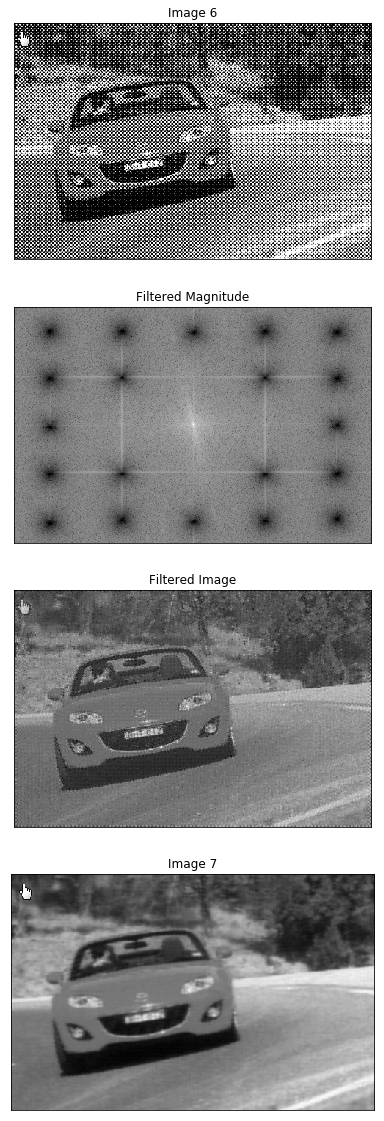

In [13]:
# Part 4: Filtering Peaks
"""
Function: filter_peaks(), butterworth()
Parameters: Image
Parmeters: D0, n, x, y, shape
D0 = Cutoff Frequency, n = 1, x & y = pixel location, shape = image shape

1. Convert the image to Frequency Domain
2. Create Butterworth function
3. Calculate each Butterworth filter for each peak
4. Calculate the total butterworth filter
5. Apply total butterworth filter to Frequency Domain Image
6. Convert the Filtered image back to Spatial Domain
7. Compare results
"""
def filter_peaks(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    shape = image.shape

    # Butterworth function
    def butterworth(D0, n, x, y, shape):
        H = np.zeros(shape)
        for i in range(shape[0]):
            for j in range(shape[1]):
                if i== x and j==y:
                    H[i,j] = 0
                else:
                    dist = ((x - i)**2 + (y - j)**2)
                    H[i,j] = 1 - (1/(1 + pow(dist/(D0**2), 2/n))) 
                H = np.array(H)
        return H

    # Calculating individual buttworth filters to flatten the peaks
    H1 = butterworth(30,1,34,49,shape)
    H2 = butterworth(30,1,98,49,shape)
    H3 = butterworth(30,1,164,49,shape)
    H4 = butterworth(30,1,228,49,shape)
    H5 = butterworth(30,1,295,49,shape)
    H6 = butterworth(30,1,34,147,shape)
    H7 = butterworth(30,1,97,147,shape)
    H8 = butterworth(30,1,228,147,shape)
    H9 = butterworth(30,1,291,147,shape)
    H10 = butterworth(30,1,35,245,shape)
    H11 = butterworth(30,1,293,245,shape)
    H12 = butterworth(30,1,34,342,shape)
    H13 = butterworth(30,1,97,342,shape)
    H14 = butterworth(30,1,229,342,shape)
    H15 = butterworth(30,1,292,342,shape)
    H16 = butterworth(30,1,35,440,shape)
    H17 = butterworth(30,1,98,440,shape)
    H18 = butterworth(30,1,162,440,shape)
    H19 = butterworth(30,1,228,440,shape)
    H20 = butterworth(30,1,290,440,shape)


    # Applying Butterworth filter to the Image
    filt_image = H1*fshift
    filt_image *= H2
    filt_image *= H3
    filt_image *= H4
    filt_image *= H5
    filt_image *= H6
    filt_image *= H7
    filt_image *= H8
    filt_image *= H9
    filt_image *= H10
    filt_image *= H11
    filt_image *= H12
    filt_image *= H13
    filt_image *= H14
    filt_image *= H15
    filt_image *= H16
    filt_image *= H17
    filt_image *= H18
    filt_image *= H19
    filt_image *= H20

    # Shifting Image back to Spatial Domain
    ifftshift = np.fft.ifftshift(filt_image)
    ifft2 = np.fft.ifft2(ifftshift)
    ifft2 = ifft2.real

    # Plotting Results
    plt.figure(figsize = (20,20))
    plt.subplot(411),plt.imshow(img6,cmap = 'gray'),plt.title("Image 6"),plt.xticks([]),plt.yticks([])
    plt.subplot(412),plt.imshow(np.log(1+np.abs(filt_image)), cmap='gray'),plt.title("Filtered Magnitude"),plt.xticks([]),plt.yticks([])
    plt.subplot(413),plt.imshow(ifft2,cmap = 'gray'),plt.title("Filtered Image"),plt.xticks([]),plt.yticks([])
    plt.subplot(414),plt.imshow(img7,cmap = 'gray'),plt.title("Image 7"),plt.xticks([]),plt.yticks([])
    plt.show()
filter_peaks(img6)